EXERCISE 3.2

In [70]:
import numpy as np 
import scipy.linalg as lin
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [85]:
# radius is set tot 2

# n = 41 makes the spacing nice; n = 21 is another options.
# In general, the spacing has to be chosen s.t. the source coordinate can be recognized.
#  

def laplacian_circle_matrix(n): 
    N = n * n  
    laplacian = np.zeros((N, N)) 
    points_within_boundary = []
    
    x = np.linspace(-2, 2, n)
    y = np.linspace(-2, 2, n)
    

    # This as all the same as in 3.1:
    for i in range(n):
        for j in range(n):
            if x[i]**2 + y[j]**2 <= 4:
                index = i * n + j  # corresponding index in the stacked vector
                points_within_boundary.append(index)
    
    for i in range(N):  
        if i in points_within_boundary:  
            laplacian[i, i] = -4  

        if (i - 1 in points_within_boundary) and (i % n) != 0:
            laplacian[i, i - 1] = 1
            laplacian[i - 1, i] = 1 

        if (i + 1 in points_within_boundary) and ((i + 1) % n) != 0:
            laplacian[i, i + 1] = 1
            laplacian[i + 1, i] = 1  

        if (i - n in points_within_boundary):
            laplacian[i, i - n] = 1
            laplacian[i - n, i] = 1  

        if (i + n in points_within_boundary):
            laplacian[i, i + n] = 1
            laplacian[i + n, i] = 1

    # We also need to incorporate the source, this means overwriting 1 row in the matrix:
    index_source_row =  np.where(np.isclose(x,0.6))[0]*n + np.where(np.isclose(y,1.2))[0] #There really should be a way to make this cleaner
    laplacian[index_source_row,:] = 0
    laplacian[index_source_row,index_source_row] = 1

    return points_within_boundary


In [73]:
# Let M equal to matrix returned by the function above. b = (0,0,...,0,1,0,...,0,0), more carefully defined in the report.
# We now solve Mc = b
# We first consider the system for n = 21

x = np.linspace(-2, 2, 21)
y = np.linspace(-2, 2, 21)

b = np.zeros(441)
b[np.where(np.isclose(x,0.6))[0]*21 + np.where(np.isclose(y,1.2))[0]] = 1

M = laplacian_circle_matrix(21)

===================================================================================================================================================

HERE, WE TRY TO SOLVE THE PROBLEM USING METHOD (1) OF THE HINT

In [136]:
#DEZE IS VOLGENS MIJ GOED!!!!!!!!!!!!!!!!!!

def laplacian_circle_fix(n,L):
    R = L/2  
    coordinates_in_circle = [] 

    x = np.linspace(-R,R,n)
    y = np.linspace(-R,R,n)

    for i in range(n):
        for j in range(n):
            if x[i]**2 + y[j]**2 <= R**2:
                coordinates_in_circle.append((i,j))

    dim = len(coordinates_in_circle) 
    matrix_M = np.zeros((dim,dim)) 
    
    for count in range(dim):
        matrix_M[count,count] = -4 
        
        neighbor_check = coordinates_in_circle[count]
        if((neighbor_check[0],neighbor_check[1]+1) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0],neighbor_check[1]+1))
            matrix_M[count, loca] = 1

        if((neighbor_check[0],neighbor_check[1]-1) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0],neighbor_check[1]-1))
            matrix_M[count, loca] = 1

        if((neighbor_check[0]+1,neighbor_check[1]) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0]+1,neighbor_check[1]))
            matrix_M[count, loca] = 1

        if((neighbor_check[0]-1,neighbor_check[1]) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0]-1,neighbor_check[1]))
            matrix_M[count, loca] = 1

    return matrix_M

In [ ]:
#now L is fixed to fixed to 4 and a source is added let n=21 or 41 s.t the source at (0.6,1.2) is identified.

def laplacian_circle_fix_2(n,L):
    R = L/2  
    coordinates_in_circle = [] 

    x = np.linspace(-R,R,n)
    y = np.linspace(-R,R,n)

    for i in range(n):
        for j in range(n):
            if x[i]**2 + y[j]**2 <= R**2:
                coordinates_in_circle.append((j,i))

    dim = len(coordinates_in_circle) 
    matrix_M = np.zeros((dim,dim)) 
    
    for count in range(dim):
        matrix_M[count,count] = -4 
        
        neighbor_check = coordinates_in_circle[count]
        if((neighbor_check[0],neighbor_check[1]+1) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0],neighbor_check[1]+1))
            matrix_M[count, loca] = 1

        if((neighbor_check[0],neighbor_check[1]-1) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0],neighbor_check[1]-1))
            matrix_M[count, loca] = 1

        if((neighbor_check[0]+1,neighbor_check[1]) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0]+1,neighbor_check[1]))
            matrix_M[count, loca] = 1

        if((neighbor_check[0]-1,neighbor_check[1]) in coordinates_in_circle):
            loca = coordinates_in_circle.index((neighbor_check[0]-1,neighbor_check[1]))
            matrix_M[count, loca] = 1

    x_source = np.abs(x+1.2).argmin() # note that these are in the circle for sure. Also, note that this way of source finding makes sure a source is 
    y_source = np.abs(y-0.6).argmin() # also included in case the discretization does not match (0.6,1.2) exactly.
    source = coordinates_in_circle.index((x_source,y_source))
    matrix_M[source,:] = 0
    matrix_M[source,source] = 1

    return matrix_M,coordinates_in_circle

In [238]:
laplacian_circle_fix_2(5,4)[0]

array([[-4.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -4.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -4.]])

In [248]:
HHH = laplacian_circle_fix_2(100,4)[0] #change n here

b = np.zeros(len(HHH))
b[np.where(np.diag(HHH) == 1)] = 1

solution_c = lin.solve(HHH, b)

point_in_circle = laplacian_circle_fix_2(100,4)[1] #change n also here


n = 100 #change this to whatever we like

heatmap_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if((i,j) in point_in_circle):
            JJJ = point_in_circle.index((i,j))
            heatmap_matrix[i,j] = solution_c[JJJ]

heatmap_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 100))

Now, We visualzie the solution in a heatmap

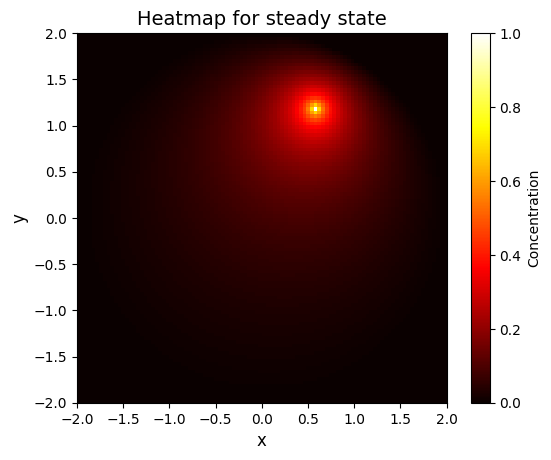

In [249]:
plt.imshow(heatmap_matrix,cmap='hot',extent=[-2,2,-2,2])
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap for steady state',size=14)
plt.colorbar(label='Concentration')
plt.show()